## Day 23 Lecture 1 Assignment

In this assignment, we will explore feature selection and dimensionality reduction techniques. We will use both the FIFA ratings dataset and the Chicago traffic crashes dataset.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
crash = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')
fifa = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [4]:
fifa.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22


We will begin with the Chicago traffic crashes dataset, focusing on removing columns with significant missing data.

Remove all columns with more than 5% missing data from the dataframe. (The *missingness summary* function we wrote a few exercises ago will speed this process up significantly.) Print out the columns that were removed, and the proportion of missing data for each column.

In [7]:
# answer goes here
def missingness_summary(df,print_log,sort):
  percentage_null = df.isnull().sum()*100/df.isnull().count()
  if sort == 'ascending':
    return percentage_null.sort_values()
  elif sort == 'descending':
    return percentage_null.sort_values(ascending=False)
  else: 
    return percentage_null

crash_data = missingness_summary(crash,0,'ascending')
print(crash_data)


RD_NO                             0.000000
STREET_NO                         0.000000
SEC_CONTRIBUTORY_CAUSE            0.000000
DATE_POLICE_NOTIFIED              0.000000
DAMAGE                            0.000000
CRASH_TYPE                        0.000000
ROAD_DEFECT                       0.000000
ROADWAY_SURFACE_COND              0.000000
ALIGNMENT                         0.000000
PRIM_CONTRIBUTORY_CAUSE           0.000000
TRAFFICWAY_TYPE                   0.000000
FIRST_CRASH_TYPE                  0.000000
LIGHTING_CONDITION                0.000000
WEATHER_CONDITION                 0.000000
CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
DEVICE_CONDITION                  0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
STREET_NAME                       0.000268
STREET_DIRECTION                  0.000537
BEAT_OF_OCCURRENCE                0.001074
NUM_UNITS                         0.375485
INJURIES_UNKNOWN                  0.577586
INJURIES_RE

In [25]:
crash_data[crash_data >5.0]

LANE_CNT                  46.710683
HIT_AND_RUN_I             72.242307
INTERSECTION_RELATED_I    77.945704
NOT_RIGHT_OF_WAY_I        95.391656
STATEMENTS_TAKEN_I        97.976032
PHOTOS_TAKEN_I            98.731833
WORK_ZONE_I               99.293316
WORK_ZONE_TYPE            99.439054
DOORING_I                 99.661554
WORKERS_PRESENT_I         99.835205
dtype: float64

In [26]:
crash1 = crash.drop(columns=['LANE_CNT', 'HIT_AND_RUN_I', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'STATEMENTS_TAKEN_I',
                         'PHOTOS_TAKEN_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'DOORING_I', 'WORKERS_PRESENT_I'])

In [27]:
crash1

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN
0,JC334993,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"OVER $1,500",7/4/2019 23:05,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JC370822,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"OVER $1,500",7/30/2019 10:25,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JC387098,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"$501 - $1,500",8/10/2019 17:35,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JC395195,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"$501 - $1,500",8/16/2019 16:53,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,JC396604,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"$501 - $1,500",8/17/2019 18:30,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372580,JC378354,8/4/2019 15:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NaN,INJURY AND / OR TOW DUE TO CRASH,"$501 - $1,500",8/4/2019 16:27,FAILING TO REDUCE SPEED TO AVOID CRASH,NOT APPLICABLE,4520,S,PULASKI RD,815.0,2.0,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0
372581,JC406679,8/25/2019 13:07,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",8/25/2019 13:08,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,5958,W,LAWRENCE AVE,1622.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0
372582,JC406342,8/25/2019 6:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",8/25/2019 7:00,PHYSICAL CONDITION OF DRIVER,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,10400,S,MICHIGAN AVE,512.0,2.0,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,0.0,0.0
372583,JC386106,8/9/2019 21:24,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,"RUT, HOLES",ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",8/9/2019 21:24,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3806,N,KEDZIE AVE,1733.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [28]:
crash_new = missingness_summary(crash1,0,'descending')
crash_new

REPORT_TYPE                      2.301220
MOST_SEVERE_INJURY               0.579465
INJURIES_UNKNOWN                 0.577586
INJURIES_NO_INDICATION           0.577586
INJURIES_REPORTED_NOT_EVIDENT    0.577586
INJURIES_NON_INCAPACITATING      0.577586
INJURIES_INCAPACITATING          0.577586
INJURIES_FATAL                   0.577586
INJURIES_TOTAL                   0.577586
NUM_UNITS                        0.375485
BEAT_OF_OCCURRENCE               0.001074
STREET_DIRECTION                 0.000537
STREET_NAME                      0.000268
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
CRASH_DATE                       0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
TRAFFICWAY_TYPE                  0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
DATE_POLICE_NOTIFIED             0.000000
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0

Next, we will shift our focus to the FIFA ratings dataset and explore univariate feature selection techniques. We will treat "Overall" as the response and the other ratings as features.

Using the correlations between the response and features, identify the 5 features with the greatest univariate correlation to the response.

In [30]:
fifa = fifa.drop(columns='ID')

In [32]:
# answer goes here
fifa_corr = fifa.corr()
print(fifa_corr.shape)
fifa_corr.head()




(30, 30)


,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Overall,1.000000,0.496603,0.373079,0.466908,0.722720,0.452090,0.516363,0.503054,0.455875,0.585104,0.717933,0.150825,0.170155,0.244344,0.847739,0.059425,0.562960,0.228271,0.461417,0.341067,0.502109,0.452916,0.333275,0.438692,0.524361,0.391124,0.801749,0.305698,0.264082,0.224365
Crossing,0.496603,1.000000,0.413404,-0.134959,0.632386,0.472485,0.712261,0.714762,0.618580,0.592781,0.682796,0.439799,0.393403,0.547590,0.461861,0.435751,0.457531,-0.027529,0.351862,-0.177255,0.548462,0.105539,0.125985,0.585624,0.643948,0.371606,0.469666,0.086971,0.085429,0.078963
Finishing,0.373079,0.413404,1.000000,0.002099,0.398895,0.814663,0.706635,0.614189,0.537508,0.218965,0.645849,0.373630,0.349087,0.480792,0.349146,0.311487,0.703408,-0.057519,0.119415,-0.125550,0.803036,-0.201407,-0.491733,0.818964,0.655283,0.744835,0.412177,-0.503042,-0.558565,-0.585841
HeadingAccuracy,0.466908,-0.134959,0.002099,1.000000,0.131909,0.062357,-0.134535,-0.091652,-0.076517,0.057267,0.069890,-0.335712,-0.238734,-0.351398,0.405671,-0.467826,0.189628,0.357951,0.161594,0.641662,0.029784,0.458631,0.286880,-0.024105,-0.079291,0.108405,0.344770,0.274280,0.257420,0.234933
ShortPassing,0.722720,0.632386,0.398895,0.131909,1.000000,0.469096,0.638983,0.614810,0.584412,0.842294,0.800317,0.171664,0.140618,0.361314,0.658269,0.252552,0.556794,0.026758,0.375038,0.041784,0.575126,0.305331,0.287053,0.501792,0.724511,0.384587,0.673243,0.244696,0.235083,0.203009


In [34]:
correlations = fifa_corr.iloc[1:,0]
np.abs(correlations).sort_values(ascending=False).head()

Reactions       0.847739
Composure       0.801749
ShortPassing    0.722720
BallControl     0.717933
LongPassing     0.585104
Name: Overall, dtype: float64

Use sklearn's "SelectKBest" function to select the top 5 features using two different scoring metrics: f_regression and mutual_info_regression. Print out the top 5 columns that are selected by both. How do they compare to the ones selected by  univariate correlation?

In [36]:
fifa1 = fifa.drop(columns='Name')

In [37]:
# answer goes here
y = fifa1['Overall']
x = fifa1.drop('Overall', axis=1)

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
k = 5
kbest = SelectKBest(k=k, score_func=f_regression)
x_best_features = kbest.fit_transform(x, y)

x_best_features = pd.DataFrame(x_best_features, columns=x.columns[kbest.get_support()])
x_best_features.columns



Index(['ShortPassing', 'LongPassing', 'BallControl', 'Reactions', 'Composure'], dtype='object')

In [38]:
k = 5
kbest1 = SelectKBest(k=k, score_func=mutual_info_regression)
x_best_features_mr = kbest1.fit_transform(x, y)

x_best_features_mr = pd.DataFrame(x_best_features_mr, columns=x.columns[kbest.get_support()])
x_best_features_mr.columns


Index(['ShortPassing', 'LongPassing', 'BallControl', 'Reactions', 'Composure'], dtype='object')

The correlation method, mutual_info_regression, and f_regression all have the same 5 top features:
* 'ShortPassing'
* 'LongPassing'
* 'BallControl'
* 'Reactions'
* 'Composure'

 

Shifting our focus from feature selection to dimensionality reduction, perform PCA on the ratings provided, excluding "Overall". Then, answer the following questions:

- What percentage of the total variance is capture by the first component? What about the first two, or first three?
- Looking at the components themselves, how would you interpret the first two components in plain English?

In [62]:
# answer goes here
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

x_pca = pca.fit_transform(x)

pd.DataFrame(x_pca)



,0,1,2,3,4
0,149.506330,43.713621,0.751949,-1.024508,0.992505
1,132.251161,45.030475,35.463517,-40.507623,-1.753660
2,133.728950,38.197322,-7.738844,-6.081650,4.097264
3,96.639505,94.488071,8.743344,4.225688,8.956373
4,129.262864,39.657653,-5.819036,-8.240421,11.787597
...,...,...,...,...,...
16117,-40.617117,-52.950248,-16.274485,27.237514,-8.627553
16118,-28.820708,-104.893217,37.007444,24.396750,3.267344
16119,-4.651104,-102.544700,-3.156806,7.874162,-7.588812
16120,-3.859407,-89.748719,-6.022899,29.420408,1.553591


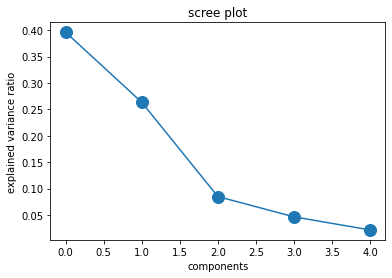

In [63]:
plt.plot(pca.explained_variance_ratio_, marker='o', markersize=12)
plt.xlabel('components')
plt.ylabel('explained variance ratio')
plt.title('scree plot')
plt.show()

The total variance of the first component is about 40%. 
For the second component, the total variance is about 26% and the third is about 9%.

After the first 2 components variance drops below 25%.
The first 2 components include about 66% total of the variance of our data. We would want to include both in our model to will give the best predictions. 